# Data Science - Minneapolis Precinct 1 - 5 Police Stop Analysis
# Capstone Project 

Afewerk Nune, May 6th, 2019

# Table of Contenst
[1.0 Definition](#1.0_Definition)<br>
    [1.1 Project Overview](#1.1_Project_Overview)<br>
    [1.2 Problems to Solve](#1.2_Problems_to_Solve)<br>
[2.0 Methodology](#2.0_Methodology)<br>
    [2.1 Getting the data & Data Processing](#2.1_Getting_the_data_&_Data_Processing)<br>
[3.0 Analysis](#3.0_Analysis)<br>
    [3.1 Data Exploration](#3.1_Data_Exploration)<br>
[4.0 Results and Conclusions](#4.0_Results_and_Conclusions)<br>
[5.0 Future Improvements](#5.0_Future_Improvements)<br>
[References](#References)<br>


## 1. Definition <a name="1.0_Definition"/><a> 
   ### 1.1 Project Overivew <a name="1.1_Project_Overview"/></a> 

This report examines the cumulative statistical data related to traffic stops from 5 precincts within the city of Minneapolis. According to the data collected by www.minniapolismn.gov, certain minority races have higher percentages of receiving police citations after being stopped. This report also explores different aspects of social factors including race, ethnicity, and neighborhoods. 

The data is frome police traffic stops during Oct 31, 2016 to Apr 29, 2019 for roughly under 3 years. There are 119924 data points with 19 columns full of raw data downloaded from [1]. The statistical analysis is done using columns with response date, race, ethnicity, neighborhood and post stop data like citations issued & vehicle searched. 

The report data only focuses on [1] reported data and not including how the data was collected or maintained. It is also possible that some agencies report only if there are injuries, potential injuries, or verbal complaints (of involved suspects or citizens) as a result of a confrontation.

### 1.2 Problems to Solve <a name='1.2_Problems_to_Solve'/></a>
1. Examine how each precinct handled calls for given demographics. 
2. Identify and describe outliers with in the dataset
3. Explore post stop reports and show who gets the most citation
4. Provide predictions for future reporting

## 2.0 Methodology <a name="2.0_Methodology"/></a> 
   ### 2.1 Getting the data & Data Processing  <a name="2.1_Getting_the_data_&_Data_Processing"/></a>

The data is collected from www.minneapolismn.gov/opendata [1] which is readily available for public at any time. Although there are multiple formats available to download, excel format is used for this report. 

The data had to be cleaned at first before being used for this report. Initially, the responseDate column had, date, time, and unique four digits code. Since there is only one time data in the response date, the time values was dropped from analysis due to a lack of meaningful purposes. Also, the prefix 'T' & four digit code '000Z' which has been placed at the beginning & end of the responseDate time values also was dropped. 

For data manipulation, numpy, padas, and matplotlib libraries have been used to compute, analyze and plots for visualizations. The data is then fed using pandas Dataframe module and used throughout the code.

## 3.0 Analysis <a name="3.0_Analysis"></a>
### 3.1 Data Exploration<a name="3.1_Data_Exploration"></a>

In [1]:
#Major libraries that will be used throughout the report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

All of the top 3 libraries will be used in much of this project. The __pandas__ and __numpy__ library will be the most used because of the available tools and features for data analysis. --Pandas__ library would be used to created __DataFram__ and used method calls to compute __central tendency__, __probabilities__, __variance__, and other calculations. 
The next library would be the plotting library __"Matplotlib"__ along with __"%matplotlib inline",__ which would be used to create visualizations for the select dataset. The __%matplotlib inline__ tool allows matplotlib to show plots without calling __plt.show()__ command in jupyter notebook every time we wanted to show plots.

In [2]:
#The data we're going to use to do all calculations and analysis
df = pd.DataFrame(pd.read_excel('data\Police_stop_data.xlsx'))

#Printing the shape of thid data gives us the rows, columns and df.columns prints out all the column values
Time_span = (df['responseDate'].max() - df['responseDate'].min());
print('This dataset has {} raws, {} columns and spans {} days.'.format(df.shape[0], df.shape[1], Time_span))
df.columns

This dataset has 119924 raws, 19 columns and spans 910 days 00:00:00 days.


Index(['OBJECTID', 'masterIncidentNumber', 'responseDate', 'Non-Usable',
       'responseTime', 'responseCode', 'citationIssued', 'personSearch',
       'vehicleSearch', 'preRace', 'race', 'gender', 'lat', 'long', 'x', 'y',
       'policePrecinct', 'neighborhood', 'lastUpdateDate'],
      dtype='object')

The first line above shows one way how data is read in python using the pandas dataframe. The police stop data downloaded from the web[1] is stored in a local machine and read using the pandas library. 

From the timespan, we see that the dataset has close to 120k rows with 19 columns and taken within 910 days period. The columns have data with responseDates, time, search type, race, gender, geolocation, precinct, and neighborhood data values we can work with for this analysis. Then, PreRace, Race, gender and neighborhood would be looked at in detail to give us insight about police data population distribution. 

In [3]:
#Lest see how the responseDate data points are populated using central tendency statistics
df_race_mean = df['responseDate'].value_counts()
df_race_mean.describe()

count    911.000000
mean     131.639956
std       38.932739
min        7.000000
25%      104.000000
50%      129.000000
75%      159.000000
max      285.000000
Name: responseDate, dtype: float64

The minimum stops with in the given period is 7 stops and a maximum of 285 stops per day. The average of police stops is at 131 people per day. These central tendency values are for the entire dataset and not separated. The next code shows the total and average data collected per precinct.

In [4]:
grouped = pd.DataFrame(df.groupby('policePrecinct')['responseDate'].count())
grouped['average'] = grouped['responseDate'] / 911
grouped

,responseDate,average
policePrecinct,,
1.0,19237,21.116356
2.0,23446,25.736553
3.0,21528,23.631175
4.0,28653,31.452250
5.0,25839,28.363337


### Table 1. Police stop data mean values per precinct

This table is the first table that shows some disparity between each precinct data collection instead of the general population. Precinct 1 collects the least and precinct 4 collects the most data compared to the rest of the precinct. Based on the data collection, precinct 4, 5,2,3,1 are ordered chronologically in descending order for data collection. 

Next, we look at how the data is distributed across racial distribution. The pie chart in Figure 1 at the bottom shows the data distribution for all the races described in the data collection including Unknown and Other which are undefined.

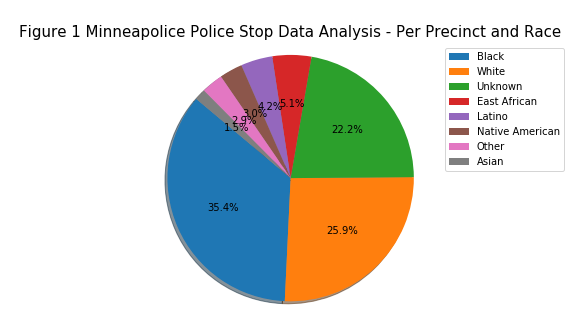

In [5]:
#generating a pie chart with the data racial demographics
Race = []
Race.append(df['race'].value_counts())
plt.figure(figsize=(10, 5))
plt.pie(Race[0], autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(Race[0].index, loc='upper right')
plt.title('\nFigure 1 Minneapolice Police Stop Data Analysis - Per Precinct and Race', size=15)
plt.axis('equal');

This data also has 'Unknown' and 'Other' races that we can't quite put in to any of the known Asian, Black, East African, Latino, Native American, and White races. Because the reports from these catagories is large, we can't just ignore the implications of these percentage. Also, in order to compare the catagories of police data with cencsus report, races with 'Black' & 'East African' and 'Unknown' & 'Other' and had to join to "Unknown" and "Other". 

To get the population distribuition per race, we have to compare the true Minnesota Census data[2] with the police stop data[1] per population accordingly.

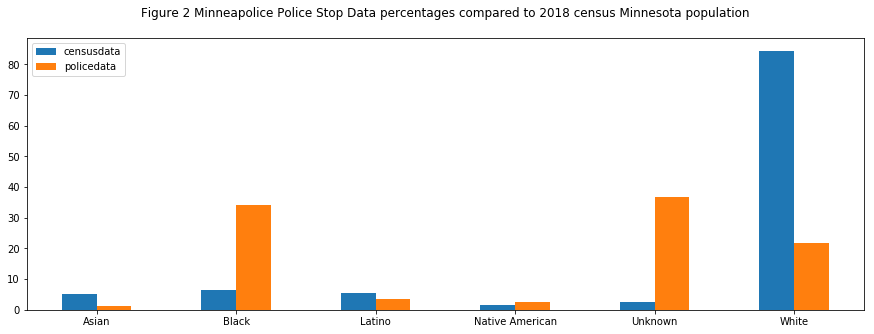

In [6]:
#Adding similar indexes
df1 = df
df['race'] = df['race'].str.replace('Other','Unknown')
df['race'] = df['race'].str.replace('East African','Black')
fill = ['preRace','race', 'gender']
df.update(df.fillna('Unknown', inplace=True))
df.update(df.fillna('Black', inplace=True))

#Create a new list and add racial values
Race1 = []
Race1.append(df['race'].value_counts())
racial = Race1[0].sort_index()

policedata = (racial.values / racial.sum())*100
censusdata = [5.1, 6.5, 5.4, 1.5, 2.5, 84.4]
races = ['Asian','Black','Latino','Native American','Unknown','White']
df2 = pd.DataFrame({'policedata': policedata, 'censusdata': censusdata}, index=races)
title = 'Figure 2 Minneapolice Police Stop Data percentages compared to 2018 census Minnesota population\n'
ax = df2.plot.bar(rot=0, figsize=(15,5), title=title)

Figure 2 is cluster bar chart with 'Black' & 'East African' grouped as 'Black' and 'Unknown' & 'Other' grouped as 'Unknown'. Both the 'policedata' and 'censusdata' in Figure 2 are percentages and not the entire statistical account. We can see that the Unknown race is the outlier for the entire data set but since we don't have any insight in to this category, we can't say much about this group. The next outliers are a person of Black race with little change from the unknown category. This is partly because, a large part of the Minnesota black population lives within these areas. 

On the other hand, Figure 2 also shows Asian, Latino and Native American census population vs police stop data correlates with one another. Native American race gets higher stops that the rest followed by Latino and Asian with least stops.

One thing to clarify here is that, the blue bars on Figure 2 show the Police stop data taken from precinct 1 to 5 only and the orange bars show the 2018 Census estimated data for the entire state of Minnesota population per race.


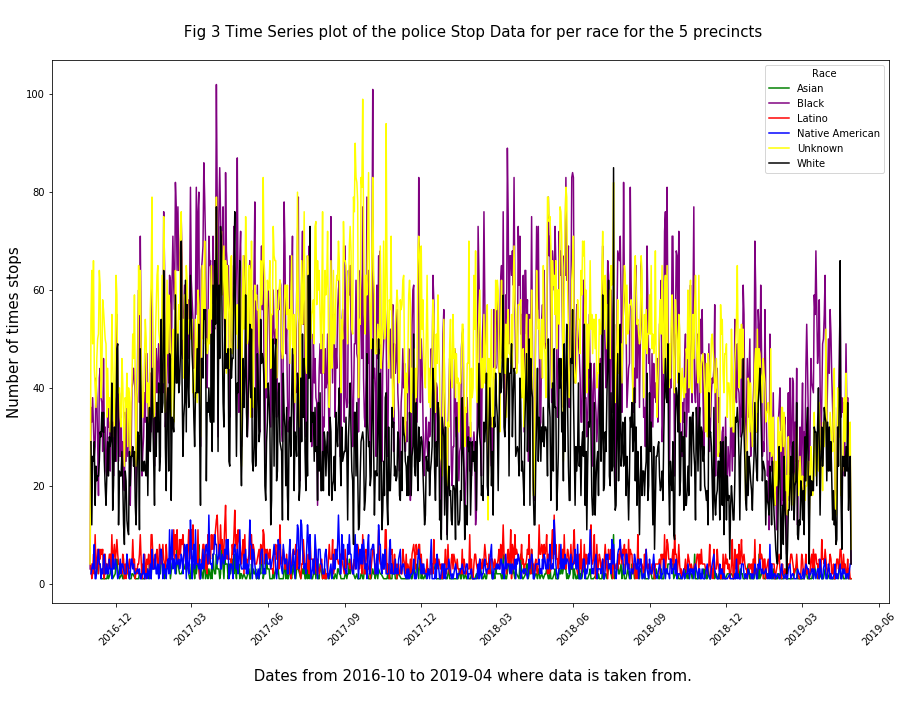

In [7]:
#Police stop data for each race and filtered per responseDate
y1 = df.loc[df['race'] == 'Asian']['responseDate'].value_counts()
y2 = df.loc[df['race'] == 'Black']['responseDate'].value_counts()
y3 = df.loc[df['race'] == 'Latino']['responseDate'].value_counts()
y4 = df.loc[df['race'] == 'Native American']['responseDate'].value_counts()
y5 = df.loc[df['race'] == 'Unknown']['responseDate'].value_counts()
y6 = df.loc[df['race'] == 'White']['responseDate'].value_counts()

#Setting up the plot layout 
plt.figure(figsize=(15, 10))
plt.subplot(1,1,1)

#Plotting each series data 'columns' with shared x 
plt.plot(y1.sort_index(), color='green', label='Asian');
plt.plot(y2.sort_index(), color='purple', label='Black');
plt.plot(y3.sort_index(), color='red', label='Latino');
plt.plot(y4.sort_index(), color='blue', label='Native American');
plt.plot(y5.sort_index(), color='yellow', label='Unknown');
plt.plot(y6.sort_index(), color='black', label='White');

#Text on the plot
plt.legend(['Asian','Black','Latino','Native American', 'Unknown', 'White'],title='Race', loc='upper right')
plt.title('\n Fig 3 Time Series plot of the police Stop Data for per race for the 5 precincts\n ', fontsize=15)
plt.ylabel('Number of times stops', fontsize=15)
plt.xlabel('\n Dates from 2016-10 to 2019-04 where data is taken from.\n', fontsize=15)
plt.xticks(rotation=45);

The plot above shows the police stop data per race filtered by the date it occurred. We can see two groupings of the data. The Asian, Native American, and Latino races experience an average of 20 or less stops throughout the dataset. The next group is the population from Black, White and Unknown races. As we indicated earlier, not much we can say about the Unknown dataset. For the most part, the purple line "Black" race graph is somewhat higher than the "Black" line "White" race graph. 

This graph also, shows the most traffic stop data taken for all the races is between 2017-01 to 2017-07. This stands as the outlier for all the races in this case. 

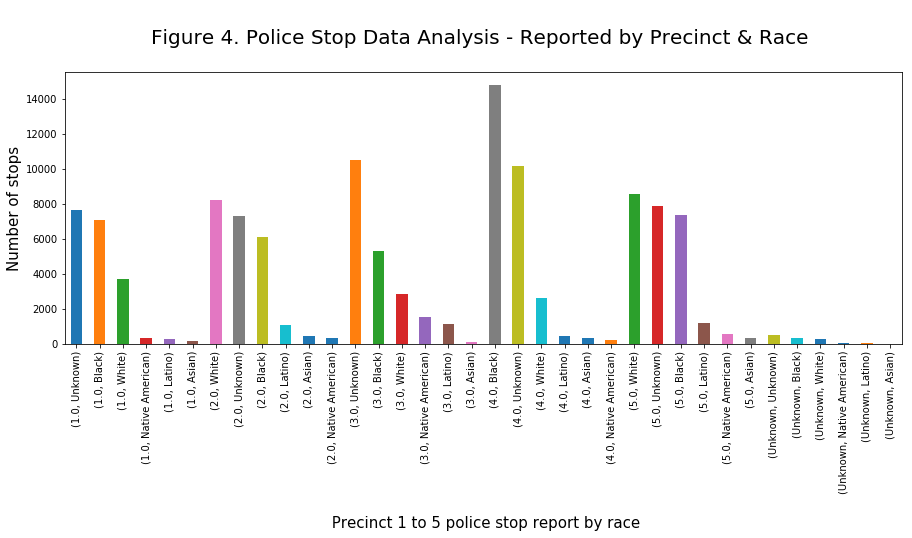

In [8]:
#Now lets look at these race desparity per pricinct and neighbourhood
plt.figure(figsize=(15,5))
df.groupby('policePrecinct')['race'].value_counts().plot(kind='bar');
plt.title('\nFigure 4. Police Stop Data Analysis - Reported by Precinct & Race \n', size=20)
plt.ylabel('Number of stops' , size=15)
plt.xlabel('\n Precinct 1 to 5 police stop report by race' , size=15);

Figure 4 revels more insight that we couldn't tell from the other 3 figures. For District 2 and 5, a person of white race is more prone to being stopped than other races. It might also be because the white race is proportionally greater and the graph is just showing what is expected.

The next big race with small percentage change is blacks, followed by East Africans. If we look at districts 1 and 3 the "Unknown" catagory of people are more frequently stopped than others followed by Black and whites. For district 2 and 5 Whites are stopped th emost followed by Unknown and Black races. For district 4 Black races have the highest percentages followed by Unknow races. The ratio of blacks traffic stopped data is so high, it’s the outlier for the entire police stop per race for all district. 

On the other hand, we can also see that, the Asian Race being stopped by police is much lower than any other race in all precincts.

Next, let's see how the data is shapped with in the 910 days period.

In [14]:
df['race'].isna().sum();

In [10]:
time_series = df.groupby('race')['responseDate','neighborhood'].describe()
time_series

responseDate                                   \
                       count unique                  top freq   
race                                                            
Asian                   1473    710  2018-07-19 00:00:00   10   
Black                  40974    911  2017-03-31 00:00:00  102   
Latino                  4222    889  2017-04-11 00:00:00   16   
Native American         3048    846  2017-08-24 00:00:00   14   
Unknown                43994    911  2017-09-22 00:00:00   99   
White                  26213    910  2018-07-19 00:00:00   85   

                                                          neighborhood         \
                               first                 last        count unique   
race                                                                            
Asian            2016-11-01 00:00:00  2019-04-29 00:00:00         1473     83   
Black            2016-10-31 00:00:00  2019-04-29 00:00:00        40974     88   
Latino           2016-11-01 00:00:00  2019-04-29 00:00:00         4222     87   
Native American  2016-11-01 00:00:00  2019-04-28 00:00:00         3048     79   
Unknown          2016-10-31 00:00:00  2019-04-29 00:00:00        43994     88   
White            2016-11-01 00:00:00  2019-04-29 00:00:00        26213     88   

                                                 
                           top  freq first last  
race                                             
Asian             Marcy Holmes   102   NaN  NaN  
Black            Downtown West  4303   NaN  NaN  
Latino                Whittier   366   NaN  NaN  
Native American  East Phillips   648   NaN  NaN  
Unknown          Downtown West  4349   NaN  NaN  
White            Downtown West  2102   NaN  NaN

### Table 2. Population distribution grouped by race, responseDate and neighborhood

The above table is a summary of the police data per race, date of response and citation issued or not. The report shows that the max values Black, Unknown, and White are much higher than that of Asian, Latino, Native American, and Other values. We know that East African descents are also considered that of Black race and we have to add the two to see the real value per race. 

In [11]:
df3 = pd.DataFrame()
df1 =df.groupby('race').count()
df3['Racial'] = df1['responseDate'][[0,1,2,3,4,5]]
df3['MN_Pop (%)'] = [5.1,6.5,5.4,1.5,2.5,84.4] 
df3.index = df1.index 
print(tabulate(df3, headers=['Race', 'Value','MN_Pop (%)']))

Race               Value    MN_Pop (%)
---------------  -------  ------------
Asian               1473           5.1
Black              40974           6.5
Latino              4222           5.4
Native American     3048           1.5
Unknown            43994           2.5
White              26213          84.4


### Table 3. Population count from 2018 census report and proportional comparison to police stop data report

Finally, we look at one last column to tell us how each police call ended up after each police stop. In order to do that, we group the data by "citationsIssued" and “race”.

In [12]:
#df4 = pd.DataFrame(df.groupby(['citationIssued','race'])['responseDate'].value_counts());
Cit_As = df.loc[df['race'] == 'Asian']['citationIssued'].value_counts();
Cit_Bl = df.loc[df['race'] == 'Black']['citationIssued'].value_counts();
Cit_La = df.loc[df['race'] == 'Latino']['citationIssued'].value_counts();
Cit_NA = df.loc[df['race'] == 'Native American']['citationIssued'].value_counts();
Cit_Un = df.loc[df['race'] == 'Unknown']['citationIssued'].value_counts();
Cit_Wh = df.loc[df['race'] == 'White']['citationIssued'].value_counts();

#Creating new table to populate all the groups who received citation
race = ['Asian','Black','Latino','Native American','Unknown','White']
Cit_vals = [Cit_As, Cit_Bl, Cit_La, Cit_NA, Cit_Un, Cit_Wh]
df4 = pd.DataFrame(Cit_vals, race)
print(tabulate(df4, headers=['Race','No', 'Unknown','Yes','Yes_Percentages']))

Race                No    Unknown    Yes
---------------  -----  ---------  -----
Asian              784        496    193
Black            23004      12291   5679
Latino            2115       1427    680
Native American   1787       1040    221
Unknown          17082      25822   1090
White            14118       8683   3412


### Table 4. Number of poeple who received citation or not per race

Now that we have the Citation issued data per race, we then look at the percentages of people who were stopped and what percentage of those people actually received citation for the given race. In order to do that, we have to combine the last two tables.

In [13]:
percentages =pd.DataFrame()
percentages['Total_stop']= df3.values[:,0]
percentages['Yes_prace']= df4.values[:,2]
percentages['diff'] = abs(percentages['Yes_prace'] - percentages['Total_stop'])
percentages['percent_itself'] = round((percentages['Yes_prace'] / percentages['Total_stop']) * 100,1)
percentages.index = df4.index
print(tabulate(percentages, headers=percentages.columns))

                   Total_stop    Yes_prace    diff    percent_itself
---------------  ------------  -----------  ------  ----------------
Asian                    1473          193    1280              13.1
Black                   40974         5679   35295              13.9
Latino                   4222          680    3542              16.1
Native American          3048          221    2827               7.3
Unknown                 43994         1090   42904               2.5
White                   26213         3412   22801              13


### Table 5. Population who received citation compared to the total stop per race

The table above is populated with data from the total police stop data per race, people who received citation and percentages of people who received citation divided by total population. Unlike all the other findings, the Latino race is the outlier for being the largest percentage 16.1 % of receiving citation proportionally. This data tells us that, if a Latino race person have 3% higher chance of receiving a citation than all other races. 

## 4.0 Results and Conclusions <a name="4.0_Results_and_Conclusions"/></a>

The findings on these report varies based on several factors and variables. Data grouping per day shows how each police stop populated across race, and result after the stop. For instance, Figure 1 shows the total population percentages from this data[1]. Similarly, Figure 2 shows a cluster bar chart with "Black" & "East African" and "Unknown" & "Other" grouped. These two groups are joined to create correlation with racial categories from the census data [2]. Figure 2 is also a cluster bar chart with percentages of census data [2] with respect to the police stop data population. 

Figure 3 and 4 show time series traffic stops from Aug 2016 to Apr 2019 also where the data spans. For both plots, the data shows two racial groupings with high and low traffic stop history. Black, Unknown and White races are grouped with much higher stops throughout the time span and Asian, Latino and Native Americans have fewer stops. This figure also shows that more traffic stops occur between January and July of each year than other times in a year. Furthermore, the bar chart in figure 4 shows outliers.

In table 4 and 5, data is grouped per "citation Issued" column to tell us the population distribution for that column. Within the given period, the highest 5679 citations were issued to Blacks, followed by 3412 citations to Whites and the least 193 citations to Asians. Proportionally, looking at percentages of values, Latino's have 16.1 % of receiving citations followed by 13.9 % Blacks and 2.5% Native Unknown.

## 5.0 Future Improvements <a name="5.0_Future_Improvements"></a>

This report could be well presented using more visualizations and tables of values either calculated or grouped. More probability calculations would help readers grasp the data better if computed for each neighborhoods, race, gender, ethnicity and age groups. In this report the major calculations done are central tendencies, percentages, and probabilities. With ample time and technical development, the listed values could be more elaborated to give insight in to the broader Minnesota and not only the 5 precincts. 

The population comparison can also be improved by comparing the precinct total population percentage with police data collected per each precinct.

## References <a name="References"></a>

1. Opendata.mninneapolismn.gov. (2019). Police Stop Data. [online] Available at: http://opendata.minneapolismn.gov/datasets/police-stop-data [Accessed 28 Apr. 2019].

2. Census Bureau QuickFacts. (2019). U.S. Census Bureau QuickFacts: Minnesota. [online] Available at: https://www.census.gov/quickfacts/fact/table/mn/PST045218 [Accessed 3 May 2019].